# A notebook to analyze and visualize tabular data
## Here, we read in a text file that has climatological data compiled at the National Weather Service in Albany NY for 2019 (via downloading and reformatting monthly CF6 Preliminary Monthly Climate Data from https://w2.weather.gov/climate/index.php?wfo=aly ) .
### We will use the <a href = "https://pandas.pydata.org/">Pandas</a> library to read and analyze the data. We will also use the <a href="https://matplotlib.org/">Matplotlib</a> package to visualize it.

### Check out http://swcarpentry.github.io/python-novice-gapminder/07-reading-tabular/index.html for a deeper dive into the use of Pandas.

## Motivating Science Questions:
1. How can we analyze and display *tabular climate data* for a site?
2. What was the yearly trace of max/min temperatures for Albany, NY last year?
3. What was the most common 10-degree maximum temperature range for Albany, NY last year?

In [3]:
# import Pandas and Numpy, and use their conventional two-letter abbreviations when we
# use methods from these packages. Also, import matplotlib's plotting package, using its 
# standard abbreviation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Specify the location of the file that contains the climo data. Use the linux <b>ls</b> command to verify it exists. 
#### Note that in a Jupyter notebook, we can simply use the <i>!</i> directive to "call" a Linux command. No need to import the subprocess module as we did in our Python script that called the *weather* program.
#### Also notice how we refer to a Python variable name when passing it to a Linux command line in this way ... we enclose it in braces!

In [1]:
file = '/spare11/atm350/common/200227/alb2019.txt'
! ls -l {file}

-rw-rw-r--. 1 ktyle faculty 30376 Feb 27 18:54 /spare11/atm350/common/200227/alb2019.txt


## Use pandas' `read_csv` method to open the file. As this file uses spaces, rather than commas, to delimit columns, set the appropriate argument so Pandas will parse it properly. Specify that the data is to be read in as strings (not integers nor floating points).
### Once this call succeeds, it returns a <i>Pandas Dataframe</i> object which we reference as `df`

In [4]:
df = pd.read_csv(file, delim_whitespace = True, dtype='str')

## By simply typing the name of the dataframe object, we can get some of its contents to be "pretty-printed" to the notebook!

In [5]:
df

,MMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
0,0101,53,27,40,16,25,0,0.10,0.0,0,15.3,36,280,M,M,8,1,55,280
1,0102,34,20,27,4,38,0,T,T,0,3.7,18,170,M,M,5,24,160,NaN
2,0103,43,32,38,15,27,0,T,0.1,T,9.7,24,290,M,M,9,34,280,NaN
3,0104,43,30,37,14,28,0,0.00,0.0,0,6.9,15,180,M,M,8,19,190,NaN
4,0105,40,29,35,12,30,0,0.42,0.0,0,4.6,18,300,M,M,9,16,23,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1227,48,40,44,19,21,0,0.01,0.0,T,11.9,20,170,M,M,9,25,170,NaN
361,1228,44,27,36,12,29,0,T,0.0,T,8.7,21,280,M,M,8,28,300,NaN
362,1229,41,26,34,10,31,0,0.62,0.0,0,2.9,17,310,M,M,7,1,23,280
363,1230,39,34,37,13,28,0,0.77,0.3,0,2.0,10,110,M,M,10,14,13,110


### Our dataframe has 365 rows (corresponding to all the days in the year 2019) and 19 columns that contain data. This is expressed by calling the `shape` attribute of the dataframe. The first number in the pair is the # of rows, while the second is the # of columns.

In [6]:
df.shape

(365, 19)

### It will be useful to have a variable (more accurately, an <i>object</i> ) that holds the value of the number of rows, and another for the number of columns.
#### Remember that Python is a language that uses <i>zero-based</i> indexing, so the first value is accessed as element 0, and the second as element 1!
#### Look at the syntax we use below to print out the (integer) value of nRows ... it's another example of **string formating**.

In [8]:
nRows = df.shape[0]
print ("Number of rows = %d" % nRows )

Number of rows = 365


### Let's do the same for the # of columns.

In [9]:
nCols = df.shape[1]
print ("Number of columns = %d" % nCols)

Number of columns = 19


### To access the values in a particular column, we reference it with its column name as a string. The next cell pulls in all values of the month-day column, and assigns it to an object of the same name. We could have named the object anything we wanted, not just MMDD ... but on the right side of the assignment statement, we have to use the exact name of the column. Print out what this object looks like.

In [10]:
MMDD = df['MMDD']
print (MMDD)

0      0101
1      0102
2      0103
3      0104
4      0105
       ... 
360    1227
361    1228
362    1229
363    1230
364    1231
Name: MMDD, Length: 365, dtype: object


### Each column of a Pandas dataframe is known as a <i>series</i>. It is basically an array of values, each of which has a corresponding row #. By default, row #'s accompanying a Series are numbered consecutively, starting with 0 (since Python's convention is to use <i>zero-based indexing </i>.

### We can reference a particular value, or set of values, of a Series by using array-based notation. Below, let's print out the first 30 rows of MMDD.

In [11]:
print (MMDD[:30])

0     0101
1     0102
2     0103
3     0104
4     0105
5     0106
6     0107
7     0108
8     0109
9     0110
10    0111
11    0112
12    0113
13    0114
14    0115
15    0116
16    0117
17    0118
18    0119
19    0120
20    0121
21    0122
22    0123
23    0124
24    0125
25    0126
26    0127
27    0128
28    0129
29    0130
Name: MMDD, dtype: object


### Similarly, let's print out the last, or 364th row (Why is it 364, not 365???)

In [12]:
print(MMDD[364])

1231


In [13]:
print(MMDD[-1:])

364    1231
Name: MMDD, dtype: object


### EXERCISE: Now, let's create new Series objects; one for Max Temp., and the other for Min Temp.

In [14]:
#Enter your code here:
maxT = df['MAX']
minT = df['MIN']

In [15]:
maxT

0      53
1      34
2      43
3      43
4      40
       ..
360    48
361    44
362    41
363    39
364    39
Name: MAX, Length: 365, dtype: object

## Let's now list all the days that the high temperature was >= 90. Note carefully how we express this test. It will fail!

In [16]:
hotDays = maxT >= 90

TypeError: '>=' not supported between instances of 'str' and 'int'

### Why did it fail? Remember, when we read in the file, we had Pandas assign the type of every column to <i>string</i>! We need to change the type of maxT to a numerical value. Let's use a 16-bit floating point #, as that will be more than enough precision for this type of measurement. We'll do the same for the minimum temp.

In [17]:
maxT = maxT.astype("float16")
minT = minT.astype("float16")

In [18]:
hotDays = maxT >= 90

### Now, the test works. What does this data series look like? It actually is a table of <i>booleans</i> ... i.e., true/false values.

In [19]:
print (hotDays)

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: MAX, Length: 365, dtype: bool


### As the default output only includes the first and last 5 rows , let's `slice` and pull out a period in the middle of the year, where we might be more likely to get some `True`s!

In [20]:
print (hotDays[180:195])

180    False
181    False
182    False
183     True
184     True
185     True
186     True
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
Name: MAX, dtype: bool


## Now, let's get a count of the # of days meeting this temperature criteria. Note carefully that we first have to express our set of days exceeding the threshold as a Pandas series. Then, recall that to get a count of the # of rows, we take the first (0th) element of the array returend by a call to the `shape` method.

In [21]:
df[maxT >= 90].shape[0]

12

### Let's reverse the sense of the test, and get its count. The two counts should add up to 365!

In [22]:
df[maxT < 90].shape[0]

353

### We can combine a test of two different thresholds. Let's get a count of days where the max. temperature was in the 70s or 80s.

In [23]:
df[(maxT< 90) & (maxT>=70)].shape[0]

126

## Let's show all the climate data for all these "pleasantly warm" days!

In [25]:
pleasant = df[(maxT< 90) & (maxT>=70)]
pleasant

,MMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
73,0315,72,44,58,24,7,0,0.03,0.0,0,13.5,26,250,M,M,6,33,270,NaN
88,0330,71,42,57,16,8,0,T,0.0,0,11.2,28,170,M,M,9,37,180,NaN
102,0413,74,52,63,16,2,0,0.04,0.0,0,8.0,22,180,M,M,7,29,170,NaN
108,0419,77,55,66,17,0,1,0.14,0.0,0,14.2,25,190,M,M,8,8,36,170
109,0420,71,60,66,16,0,1,0.45,0.0,0,14.4,28,170,M,M,8,1,38,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1001,78,60,69,14,0,4,0.64,0.0,0,10.0,17,190,M,M,9,13,25,180
274,1002,75,49,62,7,3,0,0.11,0.0,0,9.2,20,20,M,M,10,1,27,10
286,1014,71,38,55,5,10,0,0.00,0.0,0,6.3,20,300,M,M,4,1,27,290
303,1031,75,60,68,23,0,3,0.76,0.0,0,16.1,30,180,M,M,10,1,41,160


## Notice that after a certain point, not all the rows are displayed to the notebook. We can eliminate the limit of maximum rows and thus show all of the matching days.

In [26]:
pd.set_option ('display.max_rows', None)
pleasant

,MMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
73,0315,72,44,58,24,7,0,0.03,0.0,0,13.5,26,250,M,M,6,33,270,NaN
88,0330,71,42,57,16,8,0,T,0.0,0,11.2,28,170,M,M,9,37,180,NaN
102,0413,74,52,63,16,2,0,0.04,0.0,0,8.0,22,180,M,M,7,29,170,NaN
108,0419,77,55,66,17,0,1,0.14,0.0,0,14.2,25,190,M,M,8,8,36,170
109,0420,71,60,66,16,0,1,0.45,0.0,0,14.4,28,170,M,M,8,1,38,150
110,0421,72,52,62,12,3,0,0.00,0.0,0,8.5,17,190,M,M,8,24,170,NaN
111,0422,74,51,63,13,2,0,0.00,0.0,0,9.7,21,340,M,M,7,26,340,NaN
112,0423,75,50,63,12,2,0,0.16,0.0,0,5.4,15,170,M,M,6,21,180,NaN
125,0506,74,53,64,9,1,0,T,0.0,0,3.5,16,180,M,M,7,1,23,180
136,0517,73,52,63,4,2,0,0.09,0.0,0,8.9,24,280,M,M,8,32,270,NaN


### In preprearation to plot some graphics, direct the Jupyter notebook that all graphics generated by `matplotlib` will appear directly below the relevant code cell.

In [27]:
%matplotlib inline

### Now let's visualize the temperature trace over the year! Pandas has a method that directly calls Matplotlib's plotting package.

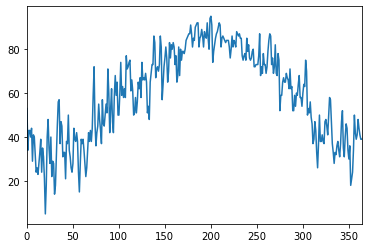

In [28]:
maxT.plot()

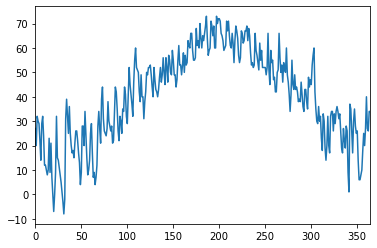

In [29]:
minT.plot()

### The data plotted fine, but the look could be better. First, let's import a package, `seaborn`, that when imported and `set` using its own method, makes matplotlib's graphs look better.

In [30]:
import seaborn
seaborn.set()

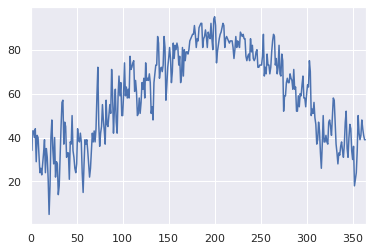

In [31]:
maxT.plot()

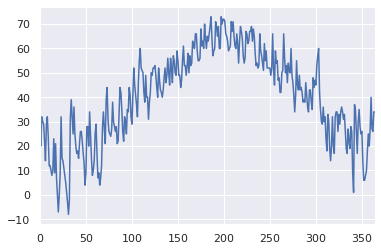

In [32]:
minT.plot()

### Next, let's plot the two traces simultaneously on the graph so we can better discern max and min temps (this will also enure a single y-axis that will encompass the range of temperature values). We'll also add some helpful labels and expand the size of the figure.

Text(0, 0.5, 'Temperature')

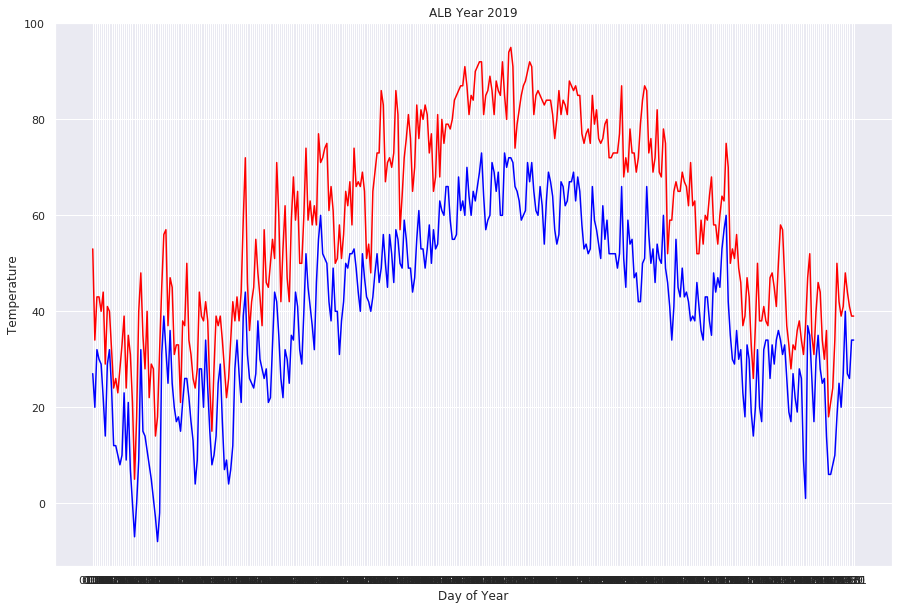

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (MMDD, maxT, color='red')
ax.plot (MMDD, minT, color='blue')
ax.set_title ("ALB Year 2019")
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature')


### You will notice that this graphic took some time to render. Note that the x-axis label is virtually unreadable. This is because every date is being printed! Let's express MMDD so it is an integer, not a string.

Text(0, 0.5, 'Temperature')

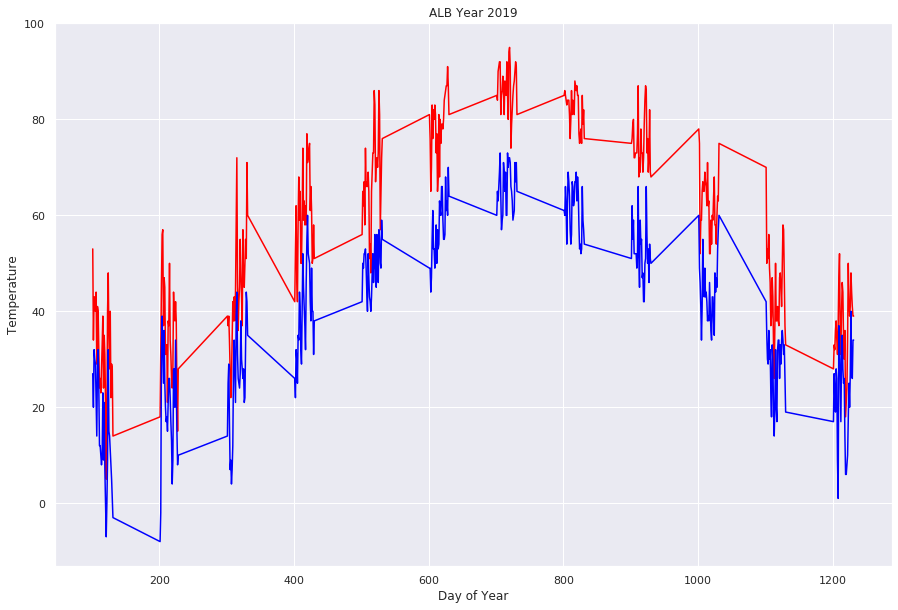

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (MMDD.astype(int), maxT, color='red')
ax.plot (MMDD.astype(int), minT, color='blue')
ax.set_title ("ALB Year 2019")
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature')


### Way faster, but this looks horrible! That's because our dates, when converted to integers, no longer are sequential ... e.g., we jump at the end of each month ... such as 131 to 201!

### We will deal with this by using one of Pandas' methods that take strings and convert them to a special type of data ... not strings nor numbers, but <i>datetime</i> objects. Note carefully how we do this here ... it is not terribly intuitive (there may be a more efficient way, but I haven't figured it out yet). You will see though that the output column now looks a bit more *date-like*, with a four-digit year followed by two-digit month and date.

In [35]:
MMDD_date = pd.to_datetime(MMDD,format="%m%d")
MMDD_date

0     1900-01-01
1     1900-01-02
2     1900-01-03
3     1900-01-04
4     1900-01-05
5     1900-01-06
6     1900-01-07
7     1900-01-08
8     1900-01-09
9     1900-01-10
10    1900-01-11
11    1900-01-12
12    1900-01-13
13    1900-01-14
14    1900-01-15
15    1900-01-16
16    1900-01-17
17    1900-01-18
18    1900-01-19
19    1900-01-20
20    1900-01-21
21    1900-01-22
22    1900-01-23
23    1900-01-24
24    1900-01-25
25    1900-01-26
26    1900-01-27
27    1900-01-28
28    1900-01-29
29    1900-01-30
30    1900-01-31
31    1900-02-01
32    1900-02-02
33    1900-02-03
34    1900-02-04
35    1900-02-05
36    1900-02-06
37    1900-02-07
38    1900-02-08
39    1900-02-09
40    1900-02-10
41    1900-02-11
42    1900-02-12
43    1900-02-13
44    1900-02-14
45    1900-02-15
46    1900-02-16
47    1900-02-17
48    1900-02-18
49    1900-02-19
50    1900-02-20
51    1900-02-21
52    1900-02-22
53    1900-02-23
54    1900-02-24
55    1900-02-25
56    1900-02-26
57    1900-02-27
58    1900-02-

### Looks good except for the year ... it is defaulting to 1900. Let's use the `replace` method of this `datetime` object and change 1900 to the year we specify.

In [36]:
for n in range(nRows):
    MMDD_date[n] = MMDD_date[n].replace(year=2019)

MMDD_date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
5     2019-01-06
6     2019-01-07
7     2019-01-08
8     2019-01-09
9     2019-01-10
10    2019-01-11
11    2019-01-12
12    2019-01-13
13    2019-01-14
14    2019-01-15
15    2019-01-16
16    2019-01-17
17    2019-01-18
18    2019-01-19
19    2019-01-20
20    2019-01-21
21    2019-01-22
22    2019-01-23
23    2019-01-24
24    2019-01-25
25    2019-01-26
26    2019-01-27
27    2019-01-28
28    2019-01-29
29    2019-01-30
30    2019-01-31
31    2019-02-01
32    2019-02-02
33    2019-02-03
34    2019-02-04
35    2019-02-05
36    2019-02-06
37    2019-02-07
38    2019-02-08
39    2019-02-09
40    2019-02-10
41    2019-02-11
42    2019-02-12
43    2019-02-13
44    2019-02-14
45    2019-02-15
46    2019-02-16
47    2019-02-17
48    2019-02-18
49    2019-02-19
50    2019-02-20
51    2019-02-21
52    2019-02-22
53    2019-02-23
54    2019-02-24
55    2019-02-25
56    2019-02-26
57    2019-02-27
58    2019-02-

### Matplotlib will recognize this array as being date/time-related, and when we pass it in as the x-axis, we have a normal-looking plot again, and we also have a more meaningful x-axis label.

Text(0, 0.5, 'Temperature')

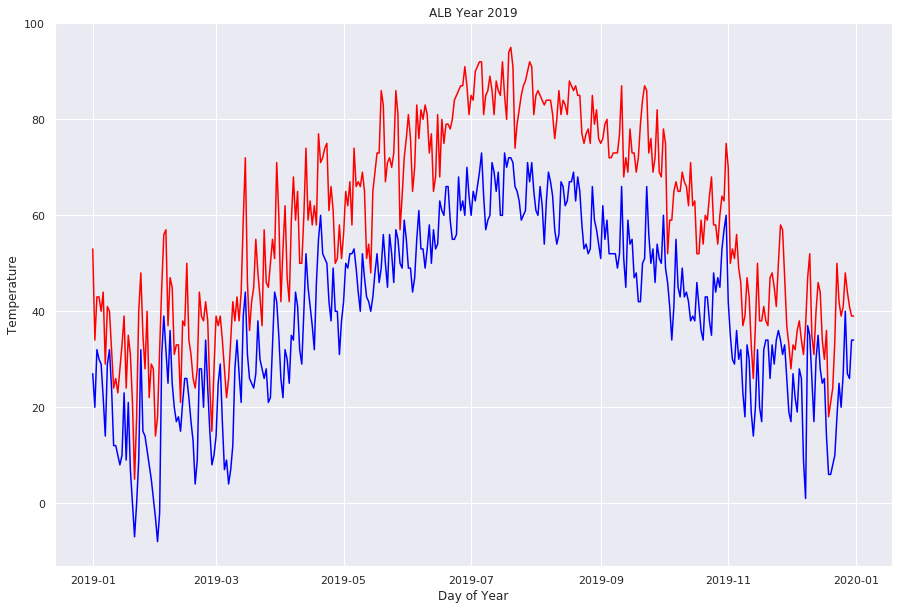

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (MMDD_date, maxT, color='red')
ax.plot (MMDD_date, minT, color='blue')
ax.set_title ("ALB Year 2019")
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature')


### We'll further refine the look of the plot by adding a legend and have vertical grid lines on a frequency of one month.

In [38]:
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator

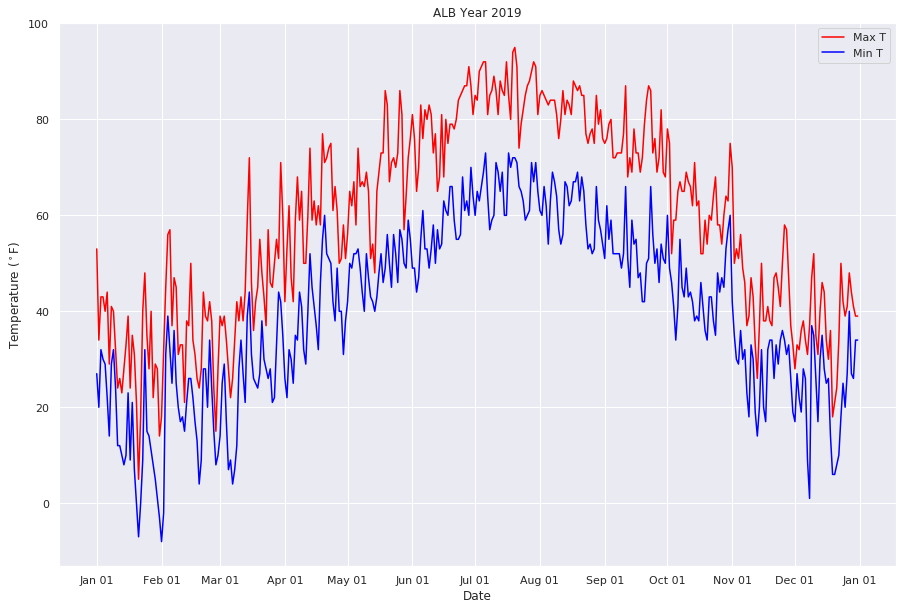

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (MMDD_date, maxT, color='red',label = "Max T")
ax.plot (MMDD_date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year 2019")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

### Let's save our beautiful graphic to disk.

In [40]:
fig.savefig ('albTemps2019.png')

## Now, let's answer the question, "what was the most common range of maximum temperatures last year in Albany?" via a histogram. We use `matplotlib`'s `hist` method.

(array([ 1., 10., 25., 53., 42., 40., 43., 57., 60., 34.]),
 array([ 5., 14., 23., 32., 41., 50., 59., 68., 77., 86., 95.],
       dtype=float16),
 <a list of 10 Patch objects>)

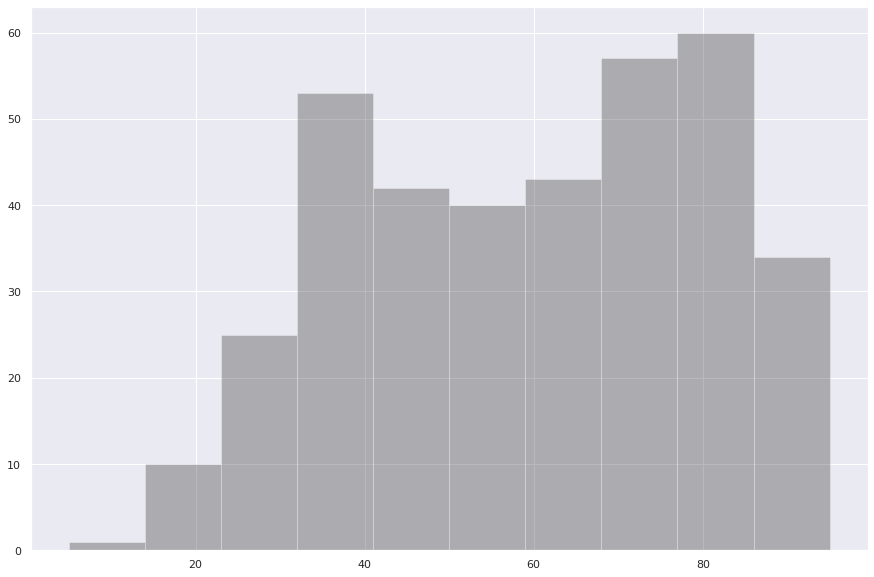

In [41]:
# Create a figure and size it.
fig, ax = plt.subplots(figsize=(15,10))
# Create a histogram of our data series and divide it in to 10 bins.
ax.hist(maxT, bins=10, color='k', alpha=0.3)

## Ok, but the 10 bins were autoselected. Let's customize our call to the `hist` method by specifying the bounds of each of our bins.
### How can we learn more about how to customize this call? Append a `?` to the name of the method.

In [42]:
ax.hist?

### Revise the call, and also draw tick marks that align with the bounds of the histogram's bins.

([<matplotlib.axis.XTick at 0x7ffad6c1e6d0>,
 <a list of 11 Text xticklabel objects>)

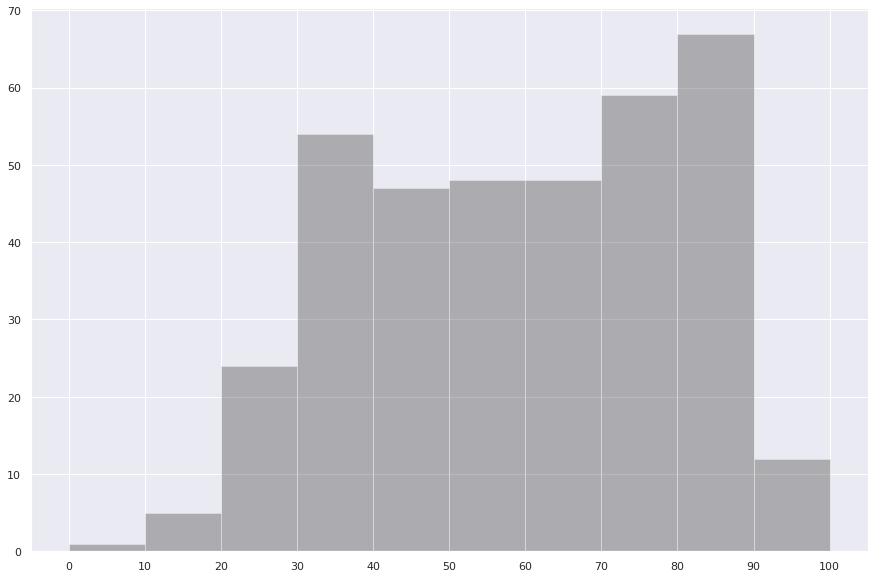

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(maxT, bins=(0,10,20,30,40,50,60,70,80,90,100), color='k', alpha=0.3)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])

### Save this histogram to disk.

In [44]:
fig.savefig("maxT_hist.png")